In [1]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from skater.core.local_interpretation.text_interpreter import auto_feature_selection, \
query_top_features_in_doc, query_top_features_overall, query_top_features_by_class, \
understand_estimator, relevance_wt_assigner, vectorize_as_tf_idf, get_feature_names
from skater.core.visualizer.text_relevance_visualizer import build_visual_explainer
from skater.util.text_ops import preprocessor
from skater.util.plotting import plot_from_df
from skater.util.text_ops import query_for_false_predictions
from skater.util.dataops import convert_dataframe_to_dict

## Dataset
### Train

In [2]:
categories = [
    'rec.autos',
    'rec.motorcycles'
]
remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                     shuffle=True, random_state=0,
                                     remove=remove)

In [3]:
X_train = data_train.data
y_train = data_train.target

In [4]:
X_train[0]

"This morning a truck that had been within my sight (and I within\nhis) for about 3 miles suddenly forgot that I existed and pulled\nover right on me -- my front wheel was about even with the back\nedge of his front passenger door as I was accelerating past him.\n\nIt was trivial enough for me to tap the brakes and slide behind him\nas he slewed over (with no signal, of course) on top of me, with\nmy little horn blaring (damn, I need Fiamms!), but the satisfaction\nof being aware of my surroundings and thus surviving was not enough,\nespecially when I later pulled up alongside the bastard and he made\nno apologetic wave or anything.\n\nIs there some way that I can memorize the license plate of an\noffending vehicle and get the name and address of the owner?\nI'm not going to firebomb houses or anything, I'd just like to\nwrite a consciousness-raising letter or two. I think that it would\nbe good for BDI cagers to know that We Know Where They Live.\nMaybe they'd use 4 or 5 brain cells w

### Test

In [5]:
data_test = fetch_20newsgroups(subset='test', categories=categories,
                                     shuffle=True, random_state=0,
                                     remove=remove)
X_test = data_test.data
y_test = data_test.target

In [6]:
X_train = [preprocessor(t) for t in X_train]
print(X_train[0])

this morning a truck that had been within my sight and i within his for about 3 miles suddenly forgot that i existed and pulled over right on me my front wheel was about even with the back edge of his front passenger door as i was accelerating past him it was trivial enough for me to tap the brakes and slide behind him as he slewed over with no signal of course on top of me with my little horn blaring damn i need fiamms but the satisfaction of being aware of my surroundings and thus surviving was not enough especially when i later pulled up alongside the bastard and he made no apologetic wave or anything is there some way that i can memorize the license plate of an offending vehicle and get the name and address of the owner i m not going to firebomb houses or anything i d just like to write a consciousness raising letter or two i think that it would be good for bdi cagers to know that we know where they live maybe they d use 4 or 5 brain cells while driving instead of the usual 3  


In [7]:
# define param_dict for TfIdf Vectorizer
param_dict = {
    'sublinear_tf':True, 
    'max_df': 0.5,
    'stop_words': 'english', 
    'smooth_idf': True,
    'ngram_range':(1, 3),
    #'max_features': 10 (didn't give the right result)
}
# Check if this can be done without calling vectorize_as_tf_idf

vectorizer, X_train = vectorize_as_tf_idf(X_train, **param_dict)
print("n_samples: %d, n_features: %d" % X_train.shape)

n_samples: 1192, n_features: 126384


In [8]:
# Names of all the features extracted
feature_names =  get_feature_names(vectorizer_inst=vectorizer)
print(len(feature_names))

126384


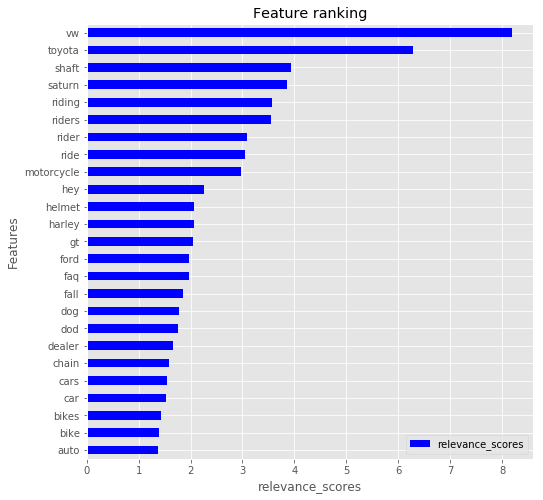

In [9]:
# 1. First Query: What are the top TF-IDF features in the training corpus
t_df = query_top_features_overall(data=X_train, y_true=y_train, feature_list=feature_names, feature_selection='chi2')

plot_from_df(t_df, 'relevance_scores', 'relevance_scores', 'Features')

In [10]:
print(categories)

['rec.autos', 'rec.motorcycles']


Class:rec.motorcycles


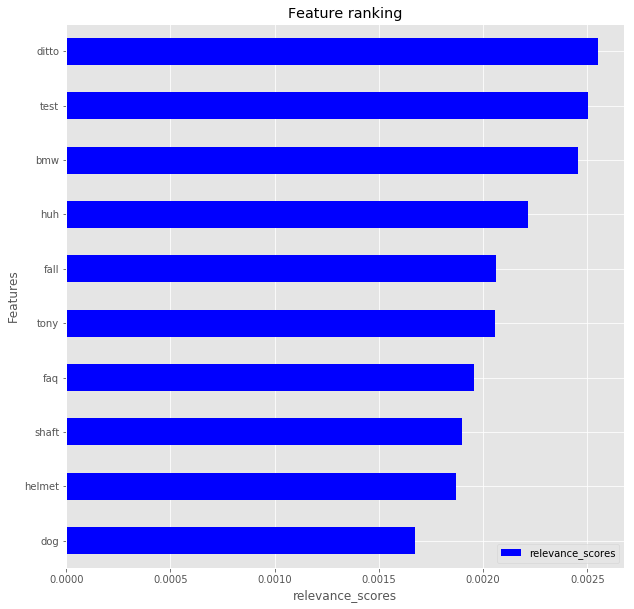

In [11]:
# 1. Query by Class
print("Class:{}".format(categories[1]))
df = query_top_features_by_class(X=X_train, y=y_train, feature_names=feature_names, class_index=1, 
                                                       summarizer_type='mean', topk_features=10, min_threshold=0.1)
plot_from_df(df, 'relevance_scores', 'relevance_scores', 'Features', display_size=(10, 10))

Target Catgeory:rec.autos


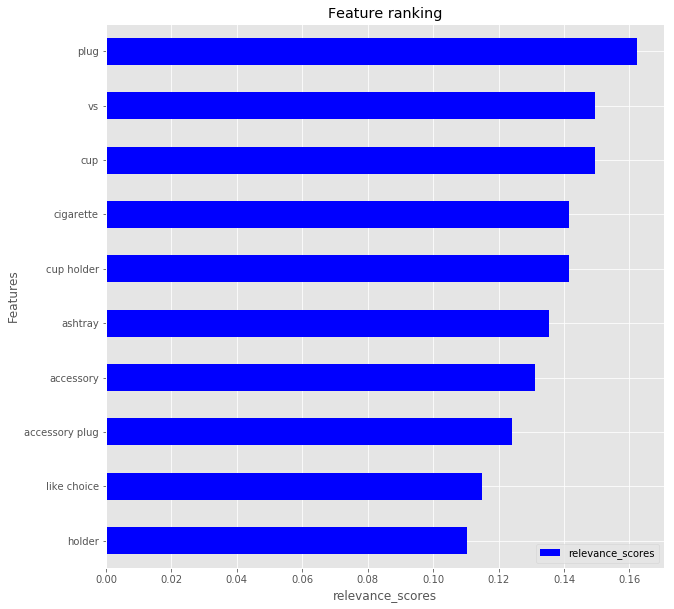

In [14]:
# 2. Query features at the document level
from random import randint
#row_index = randint(0, 300)
row_index = 1
print("Target Catgeory:{}".format(categories[y_train[row_index]]))
feature_per_doc = query_top_features_in_doc(data=X_train[row_index], features=feature_names, top_k=10)
plot_from_df(feature_per_doc, 'relevance_scores', 'relevance_scores', 'Features', display_size=(10,10))